# Useful packages

In [1]:
import matplotlib.pyplot as plt
import scipy.signal as sp
import numpy as np
import pickle

# Loading Steinmetz SPIKING data

In [37]:
#@title Data retrieval
import os, requests

fname = []
for j in range(3):
  fname.append('steinmetz_part%d.npz'%j)
url = ["https://osf.io/agvxh/download"]
url.append("https://osf.io/uv3mw/download")
url.append("https://osf.io/ehmw2/download")

for j in range(len(url)):
  if not os.path.isfile(fname[j]):
    try:
      r = requests.get(url[j])
    except requests.ConnectionError:
      print("!!! Failed to download data !!!")
    else:
      if r.status_code != requests.codes.ok:
        print("!!! Failed to download data !!!")
      else:
        with open(fname[j], "wb") as fid:
          fid.write(r.content)


In [ ]:
#@title Import matplotlib and set defaults
from matplotlib import rcParams 
from matplotlib import pyplot as plt

rcParams['figure.figsize'] = [20, 4]
rcParams['font.size'] =15
rcParams['axes.spines.top'] = False
rcParams['axes.spines.right'] = False
rcParams['figure.autolayout'] = True

In [44]:
#@title Data loading
import numpy as np

alldat = np.array([])
for j in range(len(fname)):
  alldat = np.hstack((alldat, np.load('steinmetz_part%d.npz'%j, allow_pickle=True)['dat']))

In [6]:
print(np.shape(alldat[11]['mouse_name']))
print(np.shape(alldat[11]['contrast_right']))
print(np.shape(alldat[11]['contrast_left']))
print(np.shape(alldat[11]['gocue']))
print(np.shape(alldat[11]['response_time']))
print(np.shape(alldat[11]['response']))
print(np.shape(alldat[11]['wheel']))
print(np.shape(alldat[11]['reaction_time']))

()
(340,)
(340,)


`alldat` contains 39 sessions from 10 mice, data from Steinmetz et al, 2019. Time bins for all measurements are 10ms, starting 500ms before stimulus onset. The mouse had to determine which side has the highest contrast. For each `dat = alldat[k]`, you have the fields below. For extra variables, check out the extra notebook and extra data files (lfp, waveforms and exact spike times, non-binned). 

* `dat['mouse_name']`: mouse name
* `dat['date_exp']`: when a session was performed
* `dat['spks']`: neurons by trials by time bins.    
* `dat['brain_area']`: brain area for each neuron recorded. 
* `dat['ccf']`: Allen Institute brain atlas coordinates for each neuron. 
* `dat['ccf_axes']`: axes names for the Allen CCF. 
* `dat['contrast_right']`: contrast level for the right stimulus, which is always contralateral to the recorded brain areas.
* `dat['contrast_left']`: contrast level for left stimulus. 
* `dat['gocue']`: when the go cue sound was played. 
* `dat['response_time']`: when the response was registered, which has to be after the go cue. The mouse can turn the wheel before the go cue (and nearly always does!), but the stimulus on the screen won't move before the go cue.  
* `dat['response']`: which side the response was (`-1`, `0`, `1`). When the right-side stimulus had higher contrast, the correct choice was `-1`. `0` is a no go response. 
* `dat['feedback_time']`: when feedback was provided. 
* `dat['feedback_type']`: if the feedback was positive (`+1`, reward) or negative (`-1`, white noise burst).  
* `dat['wheel']`: turning speed of the wheel that the mice uses to make a response, sampled at `10ms`. 
* `dat['pupil']`: pupil area  (noisy, because pupil is very small) + pupil horizontal and vertical position.
* `dat['face']`: average face motion energy from a video camera. 
* `dat['licks']`: lick detections, 0 or 1.   
* `dat['trough_to_peak']`: measures the width of the action potential waveform for each neuron. Widths `<=10` samples are "putative fast spiking neurons". 
* `dat['%X%_passive']`: same as above for `X` = {`spks`, `pupil`, `wheel`, `contrast_left`, `contrast_right`} but for  passive trials at the end of the recording when the mouse was no longer engaged and stopped making responses. 
* `dat['prev_reward']`: time of the feedback (reward/white noise) on the previous trial in relation to the current stimulus time. 
* `dat['reaction_time']`: ntrials by 2. First column: reaction time computed from the wheel movement as the first sample above `5` ticks/10ms bin. Second column: direction of the wheel movement (`0` = no move detected).  




# Loading Steinmetz LFP data

In [27]:
#@title Data retrieval
import os, requests

fname = ['steinmetz_st.npz']
fname.append('steinmetz_wav.npz')
fname.append('steinmetz_lfp.npz')

url = ["https://osf.io/4bjns/download"]
url.append("https://osf.io/ugm9v/download")
url.append("https://osf.io/kx3v9/download")

for j in range(len(url)):
  if not os.path.isfile(fname[j]):
    try:
      r = requests.get(url[j])
    except requests.ConnectionError:
      print("!!! Failed to download data !!!")
    else:
      if r.status_code != requests.codes.ok:
        print("!!! Failed to download data !!!")
      else:
        with open(fname[j], "wb") as fid:
          fid.write(r.content)


In [28]:
#@title Data loading
import numpy as np

dat_LFP = np.load('steinmetz_lfp.npz', allow_pickle=True)['dat']
dat_WAV = np.load('steinmetz_wav.npz', allow_pickle=True)['dat']
dat_ST = np.load('steinmetz_st.npz', allow_pickle=True)['dat']


# select just one of the recordings here. 11 is nice because it has some neurons in vis ctx. 
dat = dat_LFP[11]
print(dat.keys())
dat = dat_WAV[11]
print(dat.keys())
dat = dat_ST[11]
print(dat.keys())

dict_keys(['lfp', 'lfp_passive', 'brain_area_lfp'])
dict_keys(['waveform_w', 'waveform_u', 'trough_to_peak'])
dict_keys(['ss', 'ss_passive'])


`dat_LFP`, `dat_WAV`, `dat_ST` contain 39 sessions from 10 mice, data from Steinmetz et al, 2019, supplemental to the main data provided for NMA. Time bins for all measurements are 10ms, starting 500ms before stimulus onset (same as the main data). The followin fields are available across the three supplemental files. 

* `dat['lfp']`: recording of the local field potential in each brain area from this experiment, binned at `10ms`.
* `dat['brain_area_lfp']`: brain area names for the LFP channels. 
* `dat['trough_to_peak']`: measures the width of the action potential waveform for each neuron. Widths `<=10` samples are "putative fast spiking neurons". 
* `dat['waveform_w']`: temporal components of spike waveforms. `w@u` reconstructs the time by channels action potential shape. 
* `dat['waveform_u]`: spatial components of spike waveforms.
* `dat['ss']`: neurons by trials. Exact spikes times for each neuron and each trial, reference to the stimulus onset. A (neuron,trial) entry can be an empty list if that neuron did not fire at all on that trial. 
* `dat['%X%_passive']`: same as above for `X` = {`lfp`, `ss`} but for  passive trials at the end of the recording when the mouse was no longer engaged and stopped making responses. 




# LFP visualization (Tomáš, adapted by Darcy)

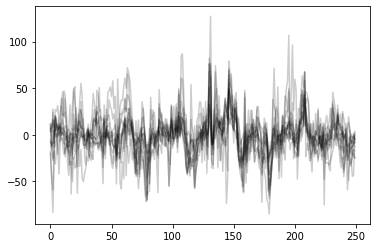

In [ ]:
# Plot one trial at once
plt_session = 11 # which session to plot
plt_trial = 3; # which trial to plot

for brain_area in range(len(dat_LFP[plt_session]['lfp'])):
  plt.plot(dat_LFP[plt_session]['lfp'][brain_area][plt_trial], 'K', alpha = 0.2)

plt.show()

# LFP preprocessing (Darcy)

## 1) Notch filter and highpass

Notch filter implemented with scipy IIR notch filter function. Documentation at https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.iirnotch.html

Highpass implemented with scipy Butterworth filter. Documentation at https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.butter.html

In [ ]:
filt_dat_LFP = dat_LFP.copy()
del dat_LFP # delete to conserve RAM

for isession in range(len(filt_dat_LFP)):

  filtered_area = np.zeros_like(filt_dat_LFP[isession]['lfp'])

  for brain_area in range(len(filt_dat_LFP[isession]['lfp'])):

    filtered_trial = np.zeros_like(filt_dat_LFP[isession]['lfp'][brain_area])

    for itrial in range(len(filt_dat_LFP[isession]['lfp'][brain_area])):

      # resample so notch filtering possible
      resampled = np.zeros(len(filt_dat_LFP[isession]['lfp'][brain_area][itrial])*2)
      resampled = sp.resample(filt_dat_LFP[isession]['lfp'][brain_area][itrial],len(filt_dat_LFP[isession]['lfp'][brain_area][itrial])*2)

      # notch filter
      fs = 200.0  # Sample frequency (Hz)
      f0 = 60.0  # Frequency to be removed from signal (Hz)
      Q = 30.0 
      b_notch, a_notch = sp.iirnotch(f0, Q, fs)
      filtered = sp.filtfilt(b_notch, a_notch, resampled) 

      # slow drift fliter
      b_butter, a_butter = sp.butter(6, 0.1, 'highpass', analog=True)
      both_filtered = sp.filtfilt(b_butter, a_butter, resampled) 

      # downsample again
      filtered_and_downsampled = np.zeros(len(both_filtered)//2)
      filtered_and_downsampled = sp.resample(both_filtered,len(both_filtered)//2)

      # save brain area
      filtered_trial[itrial] = filtered_and_downsampled

    # save trial
    # axis 0 is brain area, 1 is timepoint, so reshape
    filtered_area[brain_area] = filtered_trial

  filt_dat_LFP[isession]['lfp'] = filtered_trial

# save with pickle
with open('filteredLFP.pkl', 'wb') as f:
    pickle.dump(filt_dat_LFP, f)

In [ ]:
# Move pickle file from cloud to somewhere I can access
os.listdir('.')
!pwd
!ls
!mv /content/filtered_LFP.pkl /content/gdrive/MyDrive/repos/Mickey_Ninjas

/content
adc.json	  filteredLFP.pkl  steinmetz_lfp.npz
filteredLFP	  gdrive	   steinmetz_st.npz
filtered_LFP.pkl  sample_data	   steinmetz_wav.npz


In [30]:
# test pickle load
del filt_dat_LFP,dat_LFP
with open('filteredLFP.pkl', 'rb') as f:
    filt_dat_LFP = pickle.load(f)

In [31]:
print(np.shape(filt_dat_LFP))

(39,)


In [ ]:
# checking dimensions for saving
print(np.shape(dat_LFP[11]['lfp']))
print(np.shape(dat_LFP[11]['lfp'][0]))
print(np.shape(dat_LFP[11]['lfp'][0][0]))
dat_LFP[11].keys()
with open('filtered_LFP.pkl', 'wb') as pickle_out:
     # serialize class object
     pickle.dump(filt_dat_LFP, pickle_out)

Example trial from procedure above. Not a whole lot has happened...

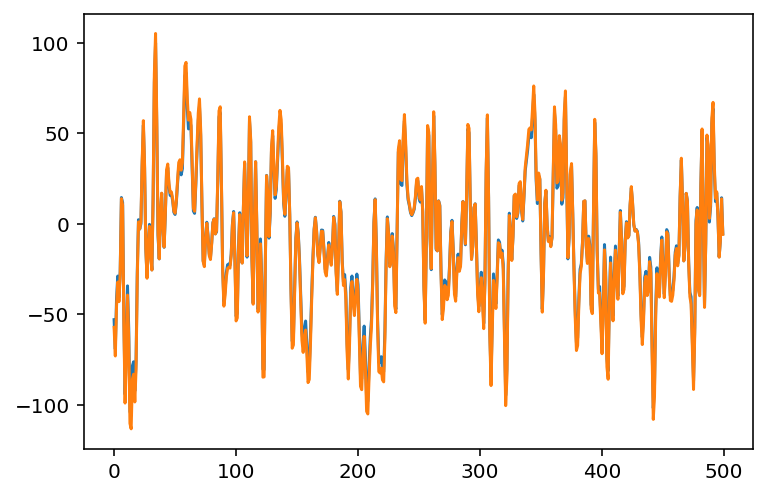

In [ ]:
# resample so notch filtering possible
resampled = np.zeros(len(dat_LFP[filt_session]['lfp'][brain_area][itrial])*2)
resampled = sp.resample(dat_LFP[filt_session]['lfp'][brain_area][itrial],len(dat_LFP[filt_session]['lfp'][brain_area][itrial])*2)

fs = 200.0  # Sample frequency (Hz)
f0 = 60.0  # Frequency to be removed from signal (Hz)
Q = 30.0 
b, a = sp.iirnotch(f0, Q, fs)
filtered = sp.filtfilt(b, a, resampled)
b_butter, a_butter = sp.butter(6, 0.01, 'highpass', analog=True)
both_filtered = sp.filtfilt(b_butter, a_butter, resampled) 
filtered_and_downsampled = np.zeros(len(both_filtered)//2)
filtered_and_downsampled = sp.resample(both_filtered,len(both_filtered)//2)

#plt.plot(dat_LFP[filt_session]['lfp'][brain_area][itrial])
plt.plot(both_filtered)
plt.plot(resampled)
plt.show()

# 2) Add relevant info to LFP sets before analysis


LFP pickled files w/ the trial labels apparently overload githubs MB limit slightly. Before analysis, reconstruct using the following cells, after loading spike data.

In [45]:
# load pickled LFP filtered sets
with open('filtered_LFP.pkl', 'rb') as f:
    filt_dat_LFP = pickle.load(f)

# for each session, pull over the info from the spiking datasets to add to LFP
for isession in range(len(alldat)):
  # mouse name
  filt_dat_LFP[isession]['mouse_name'] = alldat[isession]['mouse_name']
  filt_dat_LFP[isession]['contrast_left'] = alldat[isession]['contrast_left']
  filt_dat_LFP[isession]['contrast_right'] = alldat[isession]['contrast_right']
  filt_dat_LFP[isession]['gocue'] = alldat[isession]['gocue']
  filt_dat_LFP[isession]['response'] = alldat[isession]['response']
  filt_dat_LFP[isession]['wheel'] = alldat[isession]['wheel']
  filt_dat_LFP[isession]['reaction_time'] = alldat[isession]['reaction_time']

# so as to not crash as we proceed
del alldat
